# matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22
med = 16
small = 12
params = {'axes.titlesize' : large,
          'legend.fontsize' : med,
          'figure.figsize' : (16, 10),
          'axes.labelsize' : med,
          'axes.titlesize' : med,
          'xtick.labelsize' : med,
          'ytick.labelsize' : med,
          'figure.titlesize' : large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style('white')
%matplotlib inline

In [4]:
midwest = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/midwest_filter.csv')
print(midwest.head(10))

   PID     county state   area  poptotal   popdensity  popwhite  popblack  \
0  561      ADAMS    IL  0.052     66090  1270.961540     63917      1702   
1  562  ALEXANDER    IL  0.014     10626   759.000000      7054      3496   
2  563       BOND    IL  0.022     14991   681.409091     14477       429   
3  564      BOONE    IL  0.017     30806  1812.117650     29344       127   
4  565      BROWN    IL  0.018      5836   324.222222      5264       547   
5  566     BUREAU    IL  0.050     35688   713.760000     35157        50   
6  567    CALHOUN    IL  0.017      5322   313.058824      5298         1   
7  568    CARROLL    IL  0.027     16805   622.407407     16519       111   
8  569       CASS    IL  0.024     13437   559.875000     13384        16   
9  571  CHRISTIAN    IL  0.042     34418   819.476190     34176        82   

   popamerindian  popasian  ...  percprof  poppovertyknown  percpovertyknown  \
0             98       249  ...  4.355859            63628         96.27

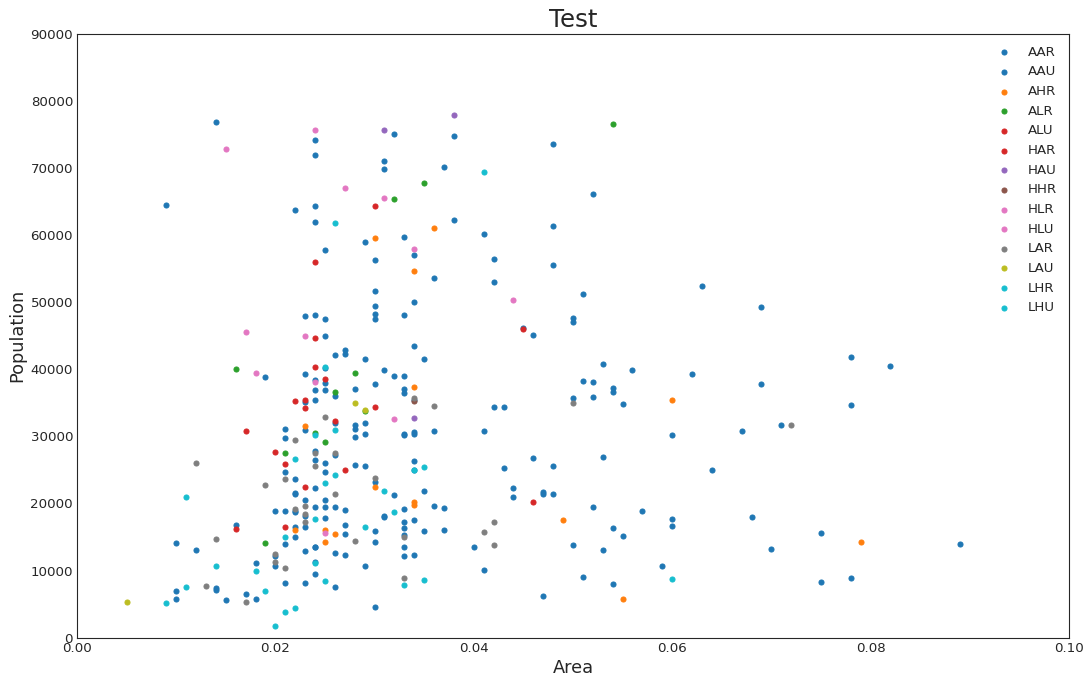

In [8]:
categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal',
                data=midwest.loc[midwest.category==category, :],
                s=20, c=[colors[i]], label=str(category))
    
plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
                xlabel='Area', ylabel='Population')
    
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Test", fontsize=22)
plt.legend(fontsize=12)
plt.show()

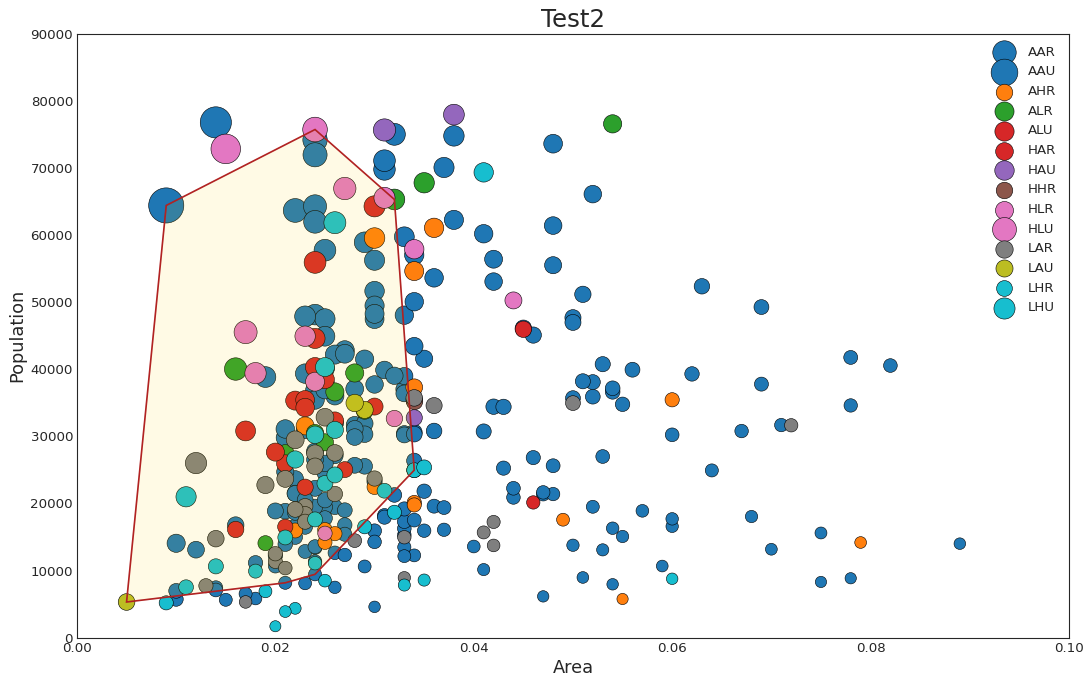

In [10]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import warnings; warnings.simplefilter('ignore')
sns.set_style('white')

categories = np.unique(midwest['category'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

fig = plt.figure(figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

for i, category in enumerate(categories):
    plt.scatter('area', 'poptotal', data=midwest.loc[midwest.category==category, :], s='dot_size', c=[colors[i]], label=str(category), edgecolors='black', linewidths=.5)

def encircle(x, y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices, :], **kw)
    ax.add_patch(poly)

midwest_encircle_data = midwest.loc[midwest.state=='IN', :]

encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec='k', fc='gold', alpha=0.1)
encircle(midwest_encircle_data.area, midwest_encircle_data.poptotal, ec='firebrick', fc='none', linewidth=1.5)

plt.gca().set(xlim=(0.0, 0.1), ylim=(0, 90000),
              xlabel='Area', ylabel='Population')
plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title('Test2', fontsize=22)
plt.legend(fontsize=12)
plt.show()

In [11]:
# displ 배기량
# yeal 제조년도
# cyl 실린더 수
# trans 변속기
# drv 구동 방식(f = 전륜, r = 후륜, 4 = 사륜)
# city 도시 연비
# hwy 고속도로 연비
# fl 연료 종류
# class 자동차 종류

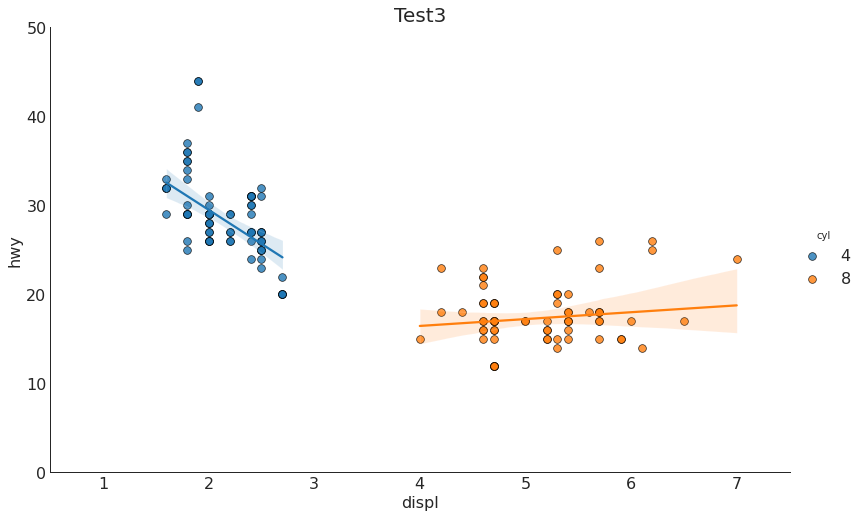

In [13]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")
df_select = df.loc[df.cyl.isin([4, 8]), :]

sns.set_style('white')
gridobj = sns.lmplot(x="displ", y='hwy', hue='cyl', data=df_select,
                     height=7, aspect=1.6, robust=True, palette='tab10',
                     scatter_kws=dict(s=60, linewidths=.7, edgecolors='black'))

gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title('Test3', fontsize=20)
plt.show()

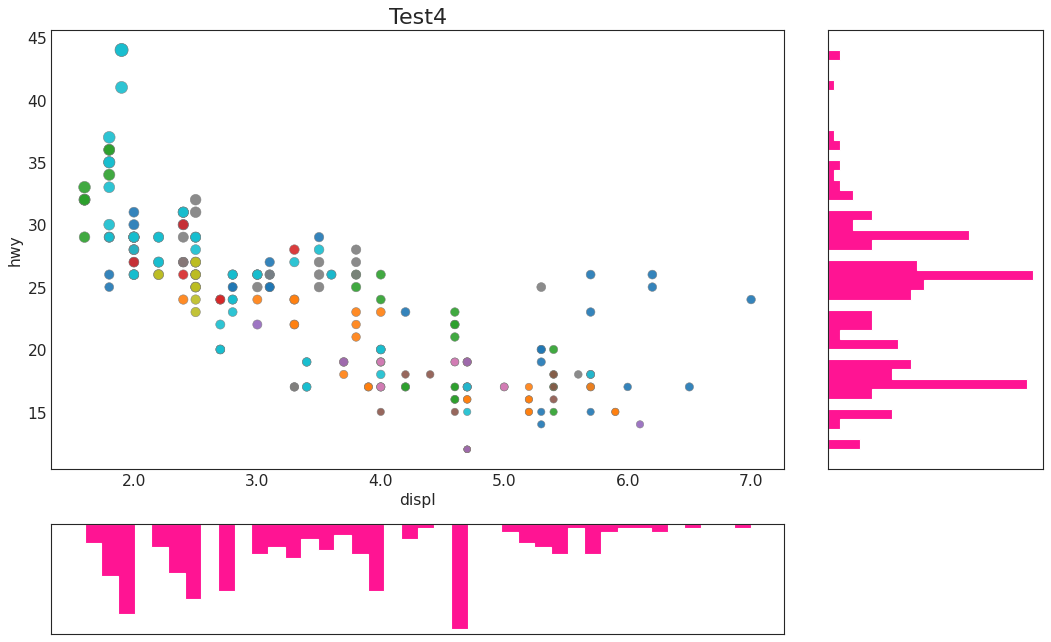

In [15]:
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/mpg_ggplot2.csv")

fig = plt.figure(figsize=(16, 10), dpi=80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

ax_main.scatter('displ', 'hwy', s=df.cty*4, c=df.manufacturer.astype('category').cat.codes, alpha=.9, data=df, cmap='tab10', edgecolors='gray', linewidths=.5)

ax_bottom.hist(df.displ, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

ax_right.hist(df.hwy, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

ax_main.set(title='Test4', xlabel='displ', ylabel='hwy')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

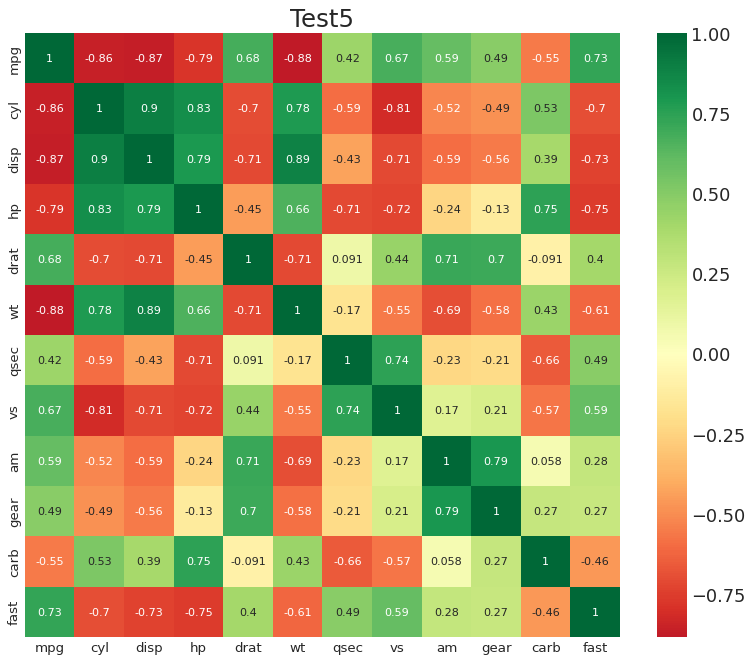

In [17]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Test5', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

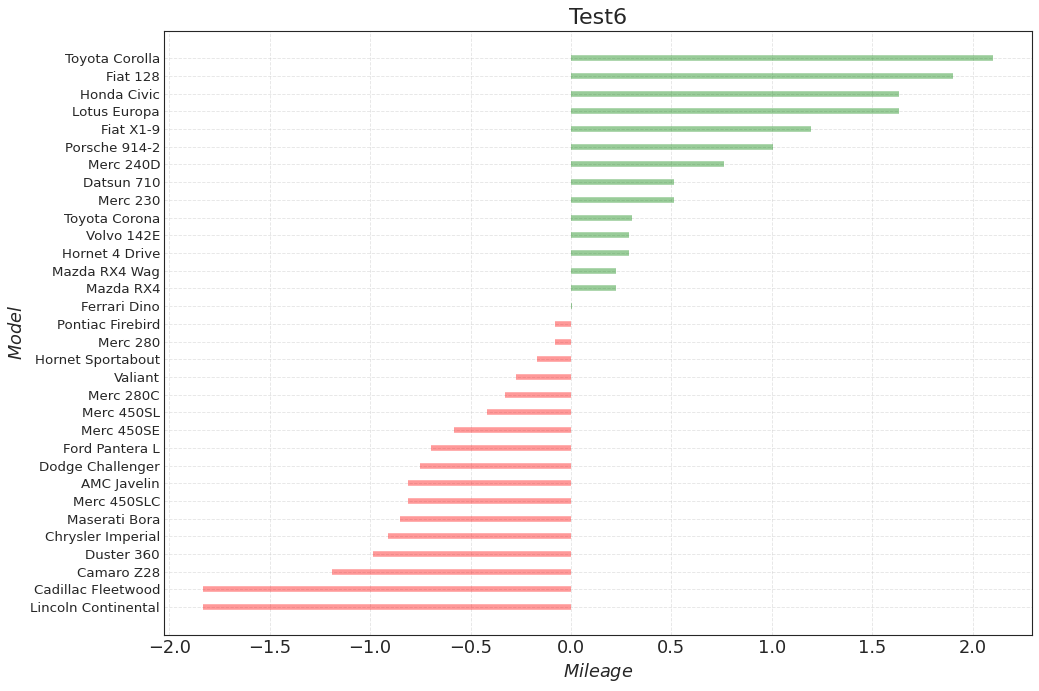

In [18]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()
df['colors'] = ['red' if x < 0 else 'green' for x in df['mpg_z']]
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

plt.figure(figsize=(14, 10), dpi=80)
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, color=df.colors, alpha=0.4, linewidth=5)

plt.gca().set(ylabel='$Model$', xlabel='$Mileage$')
plt.yticks(df.index, df.cars, fontsize=12)
plt.title('Test6', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.5)
plt.show()

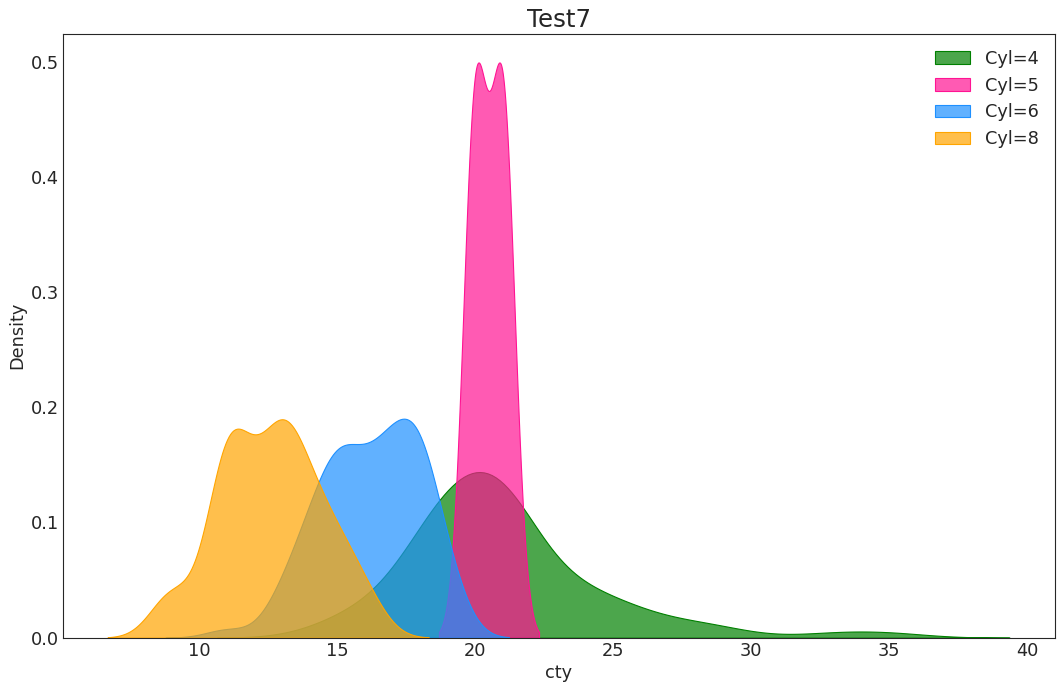

In [19]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(16, 10), dpi=80)
sns.kdeplot(df.loc[df['cyl'] == 4, 'cty'], shade=True, color='g', label='Cyl=4', alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 5, 'cty'], shade=True, color='deeppink', label='Cyl=5', alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 6, 'cty'], shade=True, color='dodgerblue', label='Cyl=6', alpha=.7)
sns.kdeplot(df.loc[df['cyl'] == 8, 'cty'], shade=True, color='orange', label='Cyl=8', alpha=.7)

plt.title('Test7', fontsize=22)
plt.legend()
plt.show()

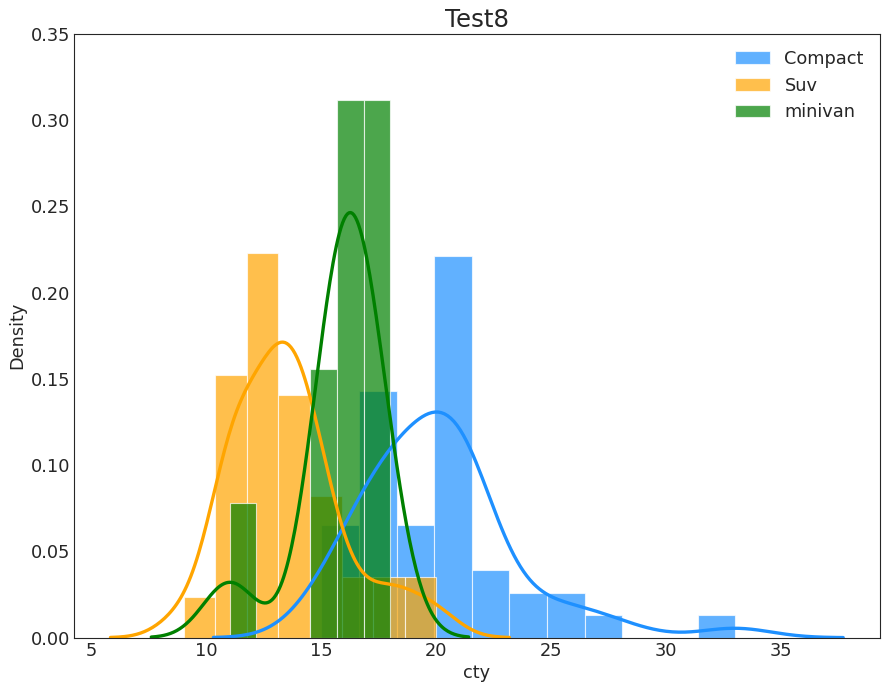

In [21]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

plt.figure(figsize=(13, 10), dpi=80)
sns.distplot(df.loc[df['class'] == 'compact', 'cty'], color='dodgerblue', label='Compact', hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', 'cty'], color='orange', label='Suv', hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', 'cty'], color='g', label='minivan', hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

plt.title('Test8', fontsize=22)
plt.legend()
plt.show()

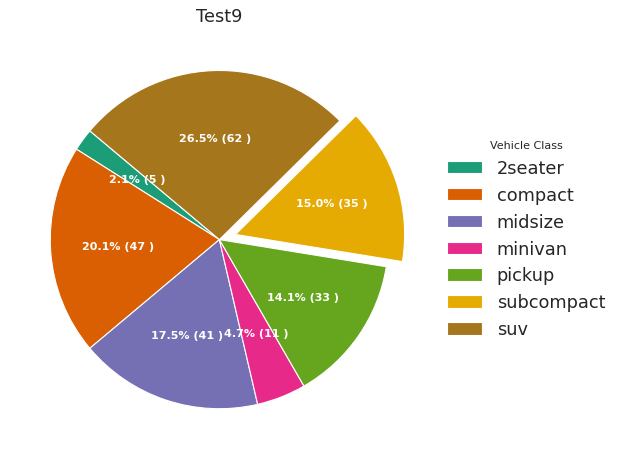

In [22]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

df = df_raw.groupby('class').size().reset_index(name='counts')

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect='equal'), dpi=80)

data = df['counts']
categories = df['class']
explode = [0, 0, 0, 0, 0, 0.1, 0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return '{:.1f}% ({:d} )'.format(pct, absolute)

wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color='w'),
                                  colors=plt.cm.Dark2.colors,
                                  startangle=140,
                                  explode=explode)

ax.legend(wedges, categories, title='Vehicle Class', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title('Test9')
plt.show()

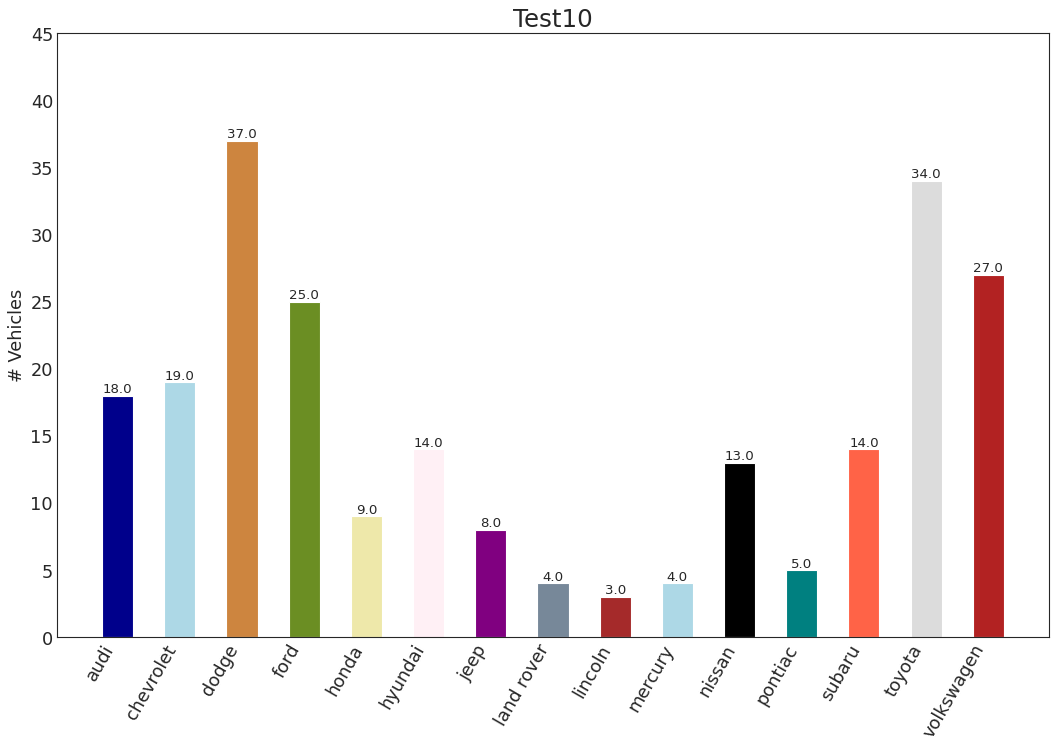

In [24]:
import random

df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

df = df_raw.groupby('manufacturer').size().reset_index(name='counts')
n = df['manufacturer'].unique().__len__() + 1
all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=n)

plt.figure(figsize=(16, 10), dpi=80)
plt.bar(df['manufacturer'], df['counts'], color=c, width=.5)
for i, val in enumerate(df['counts'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

plt.gca().set_xticklabels(df['manufacturer'], rotation=60, horizontalalignment='right')
plt.title('Test10', fontsize=22)
plt.ylabel('# Vehicles')
plt.ylim(0, 45)
plt.show()